In [1]:
import numpy as np
import pandas as pd
import random
from collections import Counter
from scipy.stats import rankdata
import matplotlib.pyplot as plt 

In [2]:
sc = ['c1','c3','c5','c6'] # semi-core courses (at least one needs to be taken)
course = ['c1','c2','c3','c4','c5','c6','c7','c8'] # all courses

hd = ['c1','c2','c3','c4'] # high-demand courses
ld = ['c5','c6','c7','c8'] # low-demand courses

# Dataset Simulation/Generation

In [3]:
def constrained_sum_sample_pos(n, total):
    """Return a randomly chosen list of n positive integers summing to total.
    Each such list is equally likely to occur."""

    dividers = sorted(random.sample(range(1, total), n - 1))
    return [a - b for a, b in zip(dividers + [total], [0] + dividers)]

In [4]:
constrained_sum_sample_pos(5,8)

[2, 1, 1, 2, 2]

In [5]:
random.sample(range(1,6),5)

[2, 3, 1, 5, 4]

In [6]:
# 40 students, the ones with: Course bids + preferences list (not used for allocation)
random.seed(0)

list_data = []
list_a = []

for i in range(40):
    
    a = constrained_sum_sample_pos(8, 1000) # generate 8 random numbers between 1-1000

    list_ = []
    num = random.sample(range(1,9),8) # a sample of 8 random numbers between 1-8

    for q in range(len(num)) :
        list_.append( 'c' + str(num[q]) )
        
    list_a.append(a)
    list_data.append(list_)
        
df00 = pd.DataFrame(list_a, columns = ['c1','c2','c3','c4','c5','c6','c7','c8']).reset_index(drop = True)
df0 = pd.DataFrame(list_data, columns = ['R1' , 'R2', 'R3', 'R4', 'R5','R6','R7','R8']).reset_index(drop = True)


df00['R1'] = df0['R1']
df00['R2'] = df0['R2']
df00['R3'] = df0['R3']
df00['R4'] = df0['R4']
df00['R5'] = df0['R5']
df00['R6'] = df0['R6']
df00['R7'] = df0['R7']
df00['R8'] = df0['R8']


df2 = df00
df2

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
0,42,224,129,36,346,88,47,88,c8,c4,c3,c7,c6,c5,c1,c2
1,98,46,113,32,345,140,45,181,c3,c8,c1,c6,c7,c2,c5,c4
2,210,114,121,181,30,279,55,10,c8,c4,c5,c3,c1,c6,c7,c2
3,409,276,43,9,67,41,16,139,c1,c5,c4,c3,c2,c7,c6,c8
4,196,32,17,337,241,117,51,9,c3,c7,c5,c4,c1,c6,c2,c8
5,112,16,171,10,252,4,159,276,c6,c7,c5,c2,c3,c8,c1,c4
6,189,5,54,50,27,265,252,158,c3,c1,c5,c8,c4,c7,c6,c2
7,40,43,71,709,35,22,26,54,c7,c8,c6,c5,c3,c4,c1,c2
8,430,164,10,92,150,71,56,27,c5,c4,c7,c3,c1,c2,c6,c8
9,17,178,54,95,258,44,220,134,c5,c1,c6,c2,c3,c7,c8,c4


In [7]:
list_data = []
list_a = []
name_array = np.array(['c1', 'c2', 'c3', 'c4' , 'c5', 'c6', 'c7', 'c8'])

In [8]:
# create array from bids
score_array = np.array(a)
score_array

array([ 37,  20, 237,  49, 404, 103, 115,  35])

In [9]:
# sort bid indices
score_indices = np.argsort(score_array)[::-1]
score_indices

array([4, 2, 6, 5, 3, 0, 7, 1])

In [10]:
# convert sorted indices to sorted preferences 
list_data.append(name_array[score_indices])
list_data

[array(['c5', 'c3', 'c7', 'c6', 'c4', 'c1', 'c8', 'c2'], dtype='<U2')]

In [11]:
# list of original bids used to compute preferences
list_a.append(a)
list_a

[[37, 20, 237, 49, 404, 103, 115, 35]]

In [12]:
random.seed(0)
# True Ranks

list_data = []
list_a = []
name_array = np.array(['c1', 'c2', 'c3', 'c4' , 'c5', 'c6', 'c7', 'c8'])


for i in range(20):
    a = constrained_sum_sample_pos(8, 1000)
    score_array = np.array(a)
    score_indices = np.argsort(score_array)[::-1] # returns the indices that would sort our array in descending order.
    
    list_data.append(name_array[score_indices])
    list_a.append(a)
    
df00 = pd.DataFrame(list_a, columns = ['c1','c2','c3','c4','c5','c6','c7','c8']).reset_index(drop = True)
df0 = pd.DataFrame(list_data, columns = ['R1' , 'R2', 'R3', 'R4', 'R5','R6','R7','R8']).reset_index(drop = True)

df00['R1'] = df0['R1']
df00['R2'] = df0['R2']
df00['R3'] = df0['R3']
df00['R4'] = df0['R4']
df00['R5'] = df0['R5']
df00['R6'] = df0['R6']
df00['R7'] = df0['R7']
df00['R8'] = df0['R8']

df3 = df00
df3

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
0,42,224,129,36,346,88,47,88,c5,c2,c3,c8,c6,c7,c1,c4
1,415,83,26,279,47,91,48,11,c1,c4,c6,c2,c7,c5,c3,c8
2,311,56,122,109,316,16,62,8,c5,c1,c3,c4,c7,c2,c6,c8
3,98,45,1,80,65,228,257,226,c7,c6,c8,c1,c4,c5,c2,c3
4,257,289,88,89,96,11,102,68,c2,c1,c7,c5,c4,c3,c8,c6
5,76,26,49,167,299,131,176,76,c5,c7,c4,c6,c8,c1,c3,c2
6,104,235,145,90,127,170,50,79,c2,c6,c3,c5,c1,c4,c8,c7
7,210,114,39,82,181,30,279,65,c7,c1,c5,c2,c4,c8,c3,c6
8,267,187,35,45,32,321,103,10,c6,c1,c2,c7,c4,c3,c5,c8
9,15,49,32,466,263,113,3,59,c4,c5,c6,c8,c2,c3,c1,c7


In [13]:
df = pd.concat([df2,df3],axis=0, ignore_index= True)
df.index.name = 'UNI'
df

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
UNI,,,,,,,,,,,,,,,,
0,42,224,129,36,346,88,47,88,c8,c4,c3,c7,c6,c5,c1,c2
1,98,46,113,32,345,140,45,181,c3,c8,c1,c6,c7,c2,c5,c4
2,210,114,121,181,30,279,55,10,c8,c4,c5,c3,c1,c6,c7,c2
3,409,276,43,9,67,41,16,139,c1,c5,c4,c3,c2,c7,c6,c8
4,196,32,17,337,241,117,51,9,c3,c7,c5,c4,c1,c6,c2,c8
5,112,16,171,10,252,4,159,276,c6,c7,c5,c2,c3,c8,c1,c4
6,189,5,54,50,27,265,252,158,c3,c1,c5,c8,c4,c7,c6,c2
7,40,43,71,709,35,22,26,54,c7,c8,c6,c5,c3,c4,c1,c2
8,430,164,10,92,150,71,56,27,c5,c4,c7,c3,c1,c2,c6,c8


## get_pref: over R's

In [14]:
def get_pref(df, sc=False):
    '''
    Returns a dictionary of students' preferences, with student UNI as the key
    sc=False gives all courses, sc=True gives only semi-core courses
    '''
    pref_dict = {}
    if sc:
        for UNI, row in df.loc[:, 'R1':'R8'].iterrows():
            sc_list = []
            for c in row.values:
                if c in ['c1','c2']: # if course is semi-core
                    sc_list.append(c)
            pref_dict[UNI] = sc_list

    else:  
        for UNI, row in df.loc[:,'R1':'R8'].iterrows():
            pref_dict[UNI] = list(row.values)

    return pref_dict

In [15]:
get_pref(df, sc = False)

{0: ['c8', 'c4', 'c3', 'c7', 'c6', 'c5', 'c1', 'c2'],
 1: ['c3', 'c8', 'c1', 'c6', 'c7', 'c2', 'c5', 'c4'],
 2: ['c8', 'c4', 'c5', 'c3', 'c1', 'c6', 'c7', 'c2'],
 3: ['c1', 'c5', 'c4', 'c3', 'c2', 'c7', 'c6', 'c8'],
 4: ['c3', 'c7', 'c5', 'c4', 'c1', 'c6', 'c2', 'c8'],
 5: ['c6', 'c7', 'c5', 'c2', 'c3', 'c8', 'c1', 'c4'],
 6: ['c3', 'c1', 'c5', 'c8', 'c4', 'c7', 'c6', 'c2'],
 7: ['c7', 'c8', 'c6', 'c5', 'c3', 'c4', 'c1', 'c2'],
 8: ['c5', 'c4', 'c7', 'c3', 'c1', 'c2', 'c6', 'c8'],
 9: ['c5', 'c1', 'c6', 'c2', 'c3', 'c7', 'c8', 'c4'],
 10: ['c4', 'c1', 'c5', 'c6', 'c7', 'c8', 'c3', 'c2'],
 11: ['c2', 'c1', 'c5', 'c7', 'c8', 'c6', 'c3', 'c4'],
 12: ['c7', 'c5', 'c1', 'c3', 'c6', 'c4', 'c8', 'c2'],
 13: ['c2', 'c6', 'c4', 'c8', 'c3', 'c5', 'c7', 'c1'],
 14: ['c3', 'c7', 'c2', 'c8', 'c5', 'c1', 'c6', 'c4'],
 15: ['c5', 'c6', 'c3', 'c4', 'c7', 'c1', 'c8', 'c2'],
 16: ['c3', 'c2', 'c4', 'c8', 'c5', 'c6', 'c7', 'c1'],
 17: ['c2', 'c1', 'c5', 'c8', 'c3', 'c7', 'c4', 'c6'],
 18: ['c7', 'c1', 'c

In [16]:
get_pref(df, True)

{0: ['c1', 'c2'],
 1: ['c1', 'c2'],
 2: ['c1', 'c2'],
 3: ['c1', 'c2'],
 4: ['c1', 'c2'],
 5: ['c2', 'c1'],
 6: ['c1', 'c2'],
 7: ['c1', 'c2'],
 8: ['c1', 'c2'],
 9: ['c1', 'c2'],
 10: ['c1', 'c2'],
 11: ['c2', 'c1'],
 12: ['c1', 'c2'],
 13: ['c2', 'c1'],
 14: ['c2', 'c1'],
 15: ['c1', 'c2'],
 16: ['c2', 'c1'],
 17: ['c2', 'c1'],
 18: ['c1', 'c2'],
 19: ['c1', 'c2'],
 20: ['c2', 'c1'],
 21: ['c2', 'c1'],
 22: ['c1', 'c2'],
 23: ['c2', 'c1'],
 24: ['c2', 'c1'],
 25: ['c1', 'c2'],
 26: ['c2', 'c1'],
 27: ['c2', 'c1'],
 28: ['c2', 'c1'],
 29: ['c1', 'c2'],
 30: ['c2', 'c1'],
 31: ['c1', 'c2'],
 32: ['c2', 'c1'],
 33: ['c1', 'c2'],
 34: ['c1', 'c2'],
 35: ['c2', 'c1'],
 36: ['c2', 'c1'],
 37: ['c1', 'c2'],
 38: ['c1', 'c2'],
 39: ['c2', 'c1'],
 40: ['c2', 'c1'],
 41: ['c1', 'c2'],
 42: ['c1', 'c2'],
 43: ['c1', 'c2'],
 44: ['c2', 'c1'],
 45: ['c1', 'c2'],
 46: ['c2', 'c1'],
 47: ['c1', 'c2'],
 48: ['c1', 'c2'],
 49: ['c2', 'c1'],
 50: ['c1', 'c2'],
 51: ['c2', 'c1'],
 52: ['c2', 'c1'],
 53

## get_bid_pref: over c's

In [17]:
def get_bid_pref(df, sc=False):
    '''
    Returns a dictionary of students' preferences, derived from course bids.
    Student UNI as key.
    sc=False gives all courses, sc=True gives only semi-core courses
    '''
    pref_dict = {}
    if sc:
        for index, row in df.loc[:,'c1':'c8'].iterrows():
            sc_list = []
            for c in row.sort_values(ascending=False).index.values:
                if c in ['c1','c2']: # if course is semi-core
                    sc_list.append(c)
            pref_dict[index] = sc_list

    else:
        for index, row in df.loc[:,'c1':'c8'].iterrows():
            pref_dict[index] = list(row.sort_values(ascending=False).index.values)

    return pref_dict

In [18]:
get_bid_pref(df, False)

{0: ['c5', 'c2', 'c3', 'c6', 'c8', 'c7', 'c1', 'c4'],
 1: ['c5', 'c8', 'c6', 'c3', 'c1', 'c2', 'c7', 'c4'],
 2: ['c6', 'c1', 'c4', 'c3', 'c2', 'c7', 'c5', 'c8'],
 3: ['c1', 'c2', 'c8', 'c5', 'c3', 'c6', 'c7', 'c4'],
 4: ['c4', 'c5', 'c1', 'c6', 'c7', 'c2', 'c3', 'c8'],
 5: ['c8', 'c5', 'c3', 'c7', 'c1', 'c2', 'c4', 'c6'],
 6: ['c6', 'c7', 'c1', 'c8', 'c3', 'c4', 'c5', 'c2'],
 7: ['c4', 'c3', 'c8', 'c2', 'c1', 'c5', 'c7', 'c6'],
 8: ['c1', 'c2', 'c5', 'c4', 'c6', 'c7', 'c8', 'c3'],
 9: ['c5', 'c7', 'c2', 'c8', 'c4', 'c3', 'c6', 'c1'],
 10: ['c4', 'c8', 'c5', 'c1', 'c3', 'c2', 'c7', 'c6'],
 11: ['c3', 'c7', 'c5', 'c8', 'c1', 'c6', 'c2', 'c4'],
 12: ['c4', 'c3', 'c7', 'c6', 'c5', 'c8', 'c2', 'c1'],
 13: ['c8', 'c4', 'c3', 'c5', 'c1', 'c7', 'c6', 'c2'],
 14: ['c3', 'c7', 'c2', 'c5', 'c1', 'c4', 'c6', 'c8'],
 15: ['c2', 'c6', 'c5', 'c4', 'c8', 'c3', 'c7', 'c1'],
 16: ['c8', 'c5', 'c3', 'c6', 'c4', 'c1', 'c2', 'c7'],
 17: ['c1', 'c4', 'c8', 'c7', 'c2', 'c5', 'c6', 'c3'],
 18: ['c1', 'c7', 'c

In [19]:
get_bid_pref(df, True)

{0: ['c2', 'c1'],
 1: ['c1', 'c2'],
 2: ['c1', 'c2'],
 3: ['c1', 'c2'],
 4: ['c1', 'c2'],
 5: ['c1', 'c2'],
 6: ['c1', 'c2'],
 7: ['c2', 'c1'],
 8: ['c1', 'c2'],
 9: ['c2', 'c1'],
 10: ['c1', 'c2'],
 11: ['c1', 'c2'],
 12: ['c2', 'c1'],
 13: ['c1', 'c2'],
 14: ['c2', 'c1'],
 15: ['c2', 'c1'],
 16: ['c1', 'c2'],
 17: ['c1', 'c2'],
 18: ['c1', 'c2'],
 19: ['c2', 'c1'],
 20: ['c2', 'c1'],
 21: ['c1', 'c2'],
 22: ['c1', 'c2'],
 23: ['c2', 'c1'],
 24: ['c1', 'c2'],
 25: ['c2', 'c1'],
 26: ['c2', 'c1'],
 27: ['c2', 'c1'],
 28: ['c2', 'c1'],
 29: ['c1', 'c2'],
 30: ['c2', 'c1'],
 31: ['c1', 'c2'],
 32: ['c1', 'c2'],
 33: ['c2', 'c1'],
 34: ['c1', 'c2'],
 35: ['c2', 'c1'],
 36: ['c2', 'c1'],
 37: ['c1', 'c2'],
 38: ['c2', 'c1'],
 39: ['c1', 'c2'],
 40: ['c2', 'c1'],
 41: ['c1', 'c2'],
 42: ['c1', 'c2'],
 43: ['c1', 'c2'],
 44: ['c2', 'c1'],
 45: ['c1', 'c2'],
 46: ['c2', 'c1'],
 47: ['c1', 'c2'],
 48: ['c1', 'c2'],
 49: ['c2', 'c1'],
 50: ['c1', 'c2'],
 51: ['c2', 'c1'],
 52: ['c2', 'c1'],
 53

In [20]:
def capacity(df, same, buffer=3):
    """
    Generate course capacities
    """
    cap = {c: 0 for c in course}
    
    if not same:
        # 4 semi-core courses take at least len(df) people
        capOfSC = round(len(df)/4)
        lastSC = len(df) - 3*capOfSC
        for c in sc:
            cap[c] += capOfSC
        cap[sc[0]] = lastSC

        remainTotalSeats = 3*len(df) - 3*capOfSC - lastSC
        capOfAll = round(remainTotalSeats/8)
        for c in course:
            cap[c] += capOfAll

        ldCap = {c: len(df) for c in ld}
        cap.update(ldCap)
    
    if same:
        # as per Yuri's recc, give all classes same capacity
        # allCap = minimum capacity per class + some buffer
        allCap = round(3*len(df)/5) + buffer #(3∗total students ÷5)+3
        cap = {c: allCap for c in course}

    return cap

In [21]:
capacity(df,False,3)

{'c1': 30,
 'c2': 15,
 'c3': 30,
 'c4': 15,
 'c5': 60,
 'c6': 60,
 'c7': 60,
 'c8': 60}

In [22]:
capacity(df,True,3)

{'c1': 39,
 'c2': 39,
 'c3': 39,
 'c4': 39,
 'c5': 39,
 'c6': 39,
 'c7': 39,
 'c8': 39}

In [23]:
df

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
UNI,,,,,,,,,,,,,,,,
0,42,224,129,36,346,88,47,88,c8,c4,c3,c7,c6,c5,c1,c2
1,98,46,113,32,345,140,45,181,c3,c8,c1,c6,c7,c2,c5,c4
2,210,114,121,181,30,279,55,10,c8,c4,c5,c3,c1,c6,c7,c2
3,409,276,43,9,67,41,16,139,c1,c5,c4,c3,c2,c7,c6,c8
4,196,32,17,337,241,117,51,9,c3,c7,c5,c4,c1,c6,c2,c8
5,112,16,171,10,252,4,159,276,c6,c7,c5,c2,c3,c8,c1,c4
6,189,5,54,50,27,265,252,158,c3,c1,c5,c8,c4,c7,c6,c2
7,40,43,71,709,35,22,26,54,c7,c8,c6,c5,c3,c4,c1,c2
8,430,164,10,92,150,71,56,27,c5,c4,c7,c3,c1,c2,c6,c8


In [24]:
#copy the df
df1 = df.copy()
df1.head()

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
UNI,,,,,,,,,,,,,,,,
0,42,224,129,36,346,88,47,88,c8,c4,c3,c7,c6,c5,c1,c2
1,98,46,113,32,345,140,45,181,c3,c8,c1,c6,c7,c2,c5,c4
2,210,114,121,181,30,279,55,10,c8,c4,c5,c3,c1,c6,c7,c2
3,409,276,43,9,67,41,16,139,c1,c5,c4,c3,c2,c7,c6,c8
4,196,32,17,337,241,117,51,9,c3,c7,c5,c4,c1,c6,c2,c8


In [25]:
'''This is the greedy approach to matching students to courses.'''
#create a dictionary of students 
students = df1.index.values

#create a dictionary of courses
courses = df1.columns.values[0:8]

#create a dictionary of students' preferences
preferences = get_pref(df1, sc=False)

#Code an algorithm to match students to courses using greedy algorithm
#The algorithm should return a dictionary of students and their matched courses
#If a student is not matched to any course, the value should be None
#Use the capacity function to generate course capacities
#Have students choose until the courses are full

def match(students, courses, preferences, capacity):
    match: dict = {} # map between students and assigned courses
    for student in students:
        match[student] = []

    count: dict = {} # count of students assigned to each course
    for course in courses:
        count[course] = 0


    for student in students:
        assigned = 0
        for course in preferences[student]:
            if assigned == 5:  # student already assigned to top 3 preferences
                break
            if count[course] < capacity[course]:
                match[student].append(course)
                count[course] += 1
                assigned += 1

    return match

match(students, courses, preferences, capacity(df1, False, 3))

{0: ['c8', 'c4', 'c3', 'c7', 'c6'],
 1: ['c3', 'c8', 'c1', 'c6', 'c7'],
 2: ['c8', 'c4', 'c5', 'c3', 'c1'],
 3: ['c1', 'c5', 'c4', 'c3', 'c2'],
 4: ['c3', 'c7', 'c5', 'c4', 'c1'],
 5: ['c6', 'c7', 'c5', 'c2', 'c3'],
 6: ['c3', 'c1', 'c5', 'c8', 'c4'],
 7: ['c7', 'c8', 'c6', 'c5', 'c3'],
 8: ['c5', 'c4', 'c7', 'c3', 'c1'],
 9: ['c5', 'c1', 'c6', 'c2', 'c3'],
 10: ['c4', 'c1', 'c5', 'c6', 'c7'],
 11: ['c2', 'c1', 'c5', 'c7', 'c8'],
 12: ['c7', 'c5', 'c1', 'c3', 'c6'],
 13: ['c2', 'c6', 'c4', 'c8', 'c3'],
 14: ['c3', 'c7', 'c2', 'c8', 'c5'],
 15: ['c5', 'c6', 'c3', 'c4', 'c7'],
 16: ['c3', 'c2', 'c4', 'c8', 'c5'],
 17: ['c2', 'c1', 'c5', 'c8', 'c3'],
 18: ['c7', 'c1', 'c4', 'c5', 'c6'],
 19: ['c8', 'c5', 'c7', 'c1', 'c6'],
 20: ['c7', 'c2', 'c5', 'c1', 'c8'],
 21: ['c2', 'c8', 'c1', 'c5', 'c7'],
 22: ['c1', 'c3', 'c4', 'c8', 'c7'],
 23: ['c4', 'c6', 'c3', 'c5', 'c7'],
 24: ['c3', 'c2', 'c4', 'c5', 'c8'],
 25: ['c6', 'c7', 'c5', 'c1', 'c8'],
 26: ['c2', 'c4', 'c6', 'c8', 'c1'],
 27: ['c2',

In [26]:
'''Score of the greedy algorithm'''
#Create a dictionary of top_3 preferences for each student
top_3_pref = {student: preferences[student][:3] for student in students}
#create a score variable 
score_1 = 0

'''#If a student is matched to a course in top_3_pref, add 1 to score_1 for each course 
for s in students:
    for c in match(students, courses, pref, capacity(df, False, 3))[s]:
        if c in top_3_pref[s]:
            score_1 += 1'''
'''#if a student is matched with their top preference, add 10 to score_1, 5 to score_1 if matched with 2nd preference, 2 to score_1 if matched with 3rd preference
for s in students:
    for c in match(students, courses, preferences, capacity(df, False, 3))[s]:
        if c == top_3_pref[s][0]:
            score_1 += 10
        elif c == top_3_pref[s][1]:
            score_1 += 5
        elif c == top_3_pref[s][2]:
            score_1 += 2
#print the average score of all students
print(score_1)
print(score_1/len(students))'''

student_total: int = 0
scores = []

#Make score_1 a percentage of the total bids used by students for their allocated courses (i.e. the sum of all bids in the match dictionary)
for s in students:
    for c in match(students, courses, preferences, capacity(df1, False))[s]:
        student_total += df1.loc[s,c]
    scores.append((s,student_total))
    student_total = 0

print(scores)
#sort the list of tuples by the second element in each tuple
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

#calculate the average score
avg_score = sum([x[1] for x in sorted_scores])/len(sorted_scores)
print(avg_score / 1000) 


[(0, 388), (1, 577), (2, 552), (3, 804), (4, 842), (5, 602), (6, 478), (7, 208), (8, 738), (9, 551), (10, 790), (11, 691), (12, 441), (13, 834), (14, 892), (15, 502), (16, 751), (17, 642), (18, 703), (19, 609), (20, 597), (21, 374), (22, 594), (23, 851), (24, 353), (25, 750), (26, 925), (27, 430), (28, 720), (29, 543), (30, 584), (31, 541), (32, 828), (33, 497), (34, 563), (35, 927), (36, 362), (37, 690), (38, 568), (39, 694), (40, 611), (41, 612), (42, 713), (43, 874), (44, 277), (45, 682), (46, 426), (47, 555), (48, 466), (49, 438), (50, 263), (51, 373), (52, 666), (53, 418), (54, 541), (55, 498), (56, 439), (57, 398), (58, 544), (59, 806)]
0.5931000000000001


In [27]:
import gurobipy as gp
from gurobipy import GRB

In [28]:
import gurobipy as gp
from gurobipy import GRB
#create a dictionary of students 
students = df.index.values

#create a dictionary of courses
courses = df.columns.values[0:8]

#create a dictionary of students' preferences
pref = get_pref(df, sc=False)

#get the bids for each student
bids = df.loc[:,'c1':'c8'].to_dict('index')
#Create a dictionary of the students and their top 3 preferences
#The preferences are in the dataframe columns R1-R8
#The preferences are in the form of a number from 1-8, where 1 is the highest preference
top_3 = df.loc[:,'R1':'R3'].to_dict('index')


#start by creating a model
m = gp.Model('student_allocation_V2')


# Create binary decision variables for each student and course combination
x = {}
for s in students:
    for c in courses:
         x[s,c] = m.addVar(vtype=GRB.BINARY, name=f'x_{s}_{c}')

        
#create a score variable that sums the bids for each individual student 




# Set constraints
# 1. Each student should be enrolled in at most 6 courses
for s in students:
    m.addConstr(sum(x[s,c] for c in courses) <= 6, name=f'at_most_3_courses_{s}')


 #2.Add constraint: each course is limited to the their capacity defined in capacity()
for c in courses:
    m.addConstr(gp.quicksum(x[s,c] for s in students) <= capacity(df, sc)[c], name=f'course_{c}_constraint')

# 3. Each student should be enrolled in at least 5 course
for s in students:
    m.addConstr(sum(x[s,c] for c in courses) >= 5, name=f'at_least_1_course_{s}')

# 4. Each student should be enrolled in at least 1 semi-core course
for s in students:
    m.addConstr(sum(x[s,c] for c in sc) >= 1, name=f'at_least_1_sc_{s}')

'''We are able to perform a maximin using this objective function'''
#set the objective to minimize the score of the lowest scoring student
#m.setObjective(sum(score*x[s,c] for s in students for c in courses), GRB.MINIMIZE)

#set the objective to maximize score 
m.setObjective(sum(score*x[s,c] for s in students for c in courses), GRB.MAXIMIZE)

# Solve model
m.optimize()

#Print the solution as a set students with the courses they are enrolled in as a dictionary
solution1 = m.getAttr('x', x)
solution1 = {s: [c for c in courses if solution1[s,c] > 0] for s in students}
solution1


Restricted license - for non-production use only - expires 2024-10-28


NameError: name 'score' is not defined

In [ ]:
#print the averge score of all students
print(score)
print(score/len(students))

7216
120.26666666666667


In [ ]:
#create a copy of df
df2 = df.copy()
df2.head()

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
UNI,,,,,,,,,,,,,,,,
0,42,224,129,36,346,88,47,88,c8,c4,c3,c7,c6,c5,c1,c2
1,98,46,113,32,345,140,45,181,c3,c8,c1,c6,c7,c2,c5,c4
2,210,114,121,181,30,279,55,10,c8,c4,c5,c3,c1,c6,c7,c2
3,409,276,43,9,67,41,16,139,c1,c5,c4,c3,c2,c7,c6,c8
4,196,32,17,337,241,117,51,9,c3,c7,c5,c4,c1,c6,c2,c8


In [ ]:
#Create a model that will allocate students to courses based on their preferences, bids, and course capacities
#create the model in gurobipy and solve it
#import gurobipy as gp
#from gurobipy import GRB
import gurobipy as gp
from gurobipy import GRB

#In the dataframe, columns c1-c8 are the bids, and R1-R8 are the preferences
#There are 8 courses being c1-c8 
#Write a model that will allocate the 60 students to the 8 courses
#The model should maximize the total number of students enrolled in the courses
#The model should also satisfy the following constraints:
#1. Each student should be enrolled in at most 3 courses
#2. Each course should have at most 20 students enrolled in it
#3. Each student should be enrolled in at least 1 course
#4. Each student should be enrolled in at least 1 semi-core course

#create a dictionary of students 
students = df.index.values

#create a dictionary of courses
courses = df.columns.values[0:8]

#get the bids for each student
bids = df.loc[:,'c1':'c8'].to_dict('index')

#start by creating a model
m = gp.Model('student_allocation')

# Create binary decision variables for each student and course combination
x = {}
for s in students:
    for c in courses:
         x[s,c] = m.addVar(vtype=GRB.BINARY, name=f'x_{s}_{c}')

# Set constraints
# 1. Each student should be enrolled in at most 5 courses
for s in students:
    m.addConstr(sum(x[s,c] for c in courses) <= 5, name=f'at_most_3_courses_{s}')

 #2.Add constraint: each course is limited to the their capacity defined in capacity()
for c in courses:
    m.addConstr(gp.quicksum(x[s,c] for s in students) <= capacity(df, sc)[c], name=f'course_{c}_constraint')

for c in courses:
    m.addConstr(gp.quicksum(x[s,c] for s in students) <= capacity(df, c)[c], name=f'course_{c}_constraint')

# 3. Each student should be enrolled in at least 5 course
for s in students:
    m.addConstr(sum(x[s,c] for c in courses) >= 5, name=f'at_least_1_course_{s}')

# 4. Each student should be enrolled in at least 1 semi-core course
for s in students:
    m.addConstr(sum(x[s,c] for c in sc) >= 1, name=f'at_least_1_sc_{s}')

# Set objective
m.setObjective(sum(bids[s][c]*x[s,c] for s in students for c in courses), GRB.MAXIMIZE)

# Solve model
m.optimize()

#Print the solution as a set students with the courses they are enrolled in as a dictionary
solution2 = m.getAttr('x', x)
solution2 = {s: [c for c in courses if solution2[s,c] > 0] for s in students}
solution2



Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) Platinum 8272CL CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 196 rows, 480 columns and 2160 nonzeros
Model fingerprint: 0x31549b3d
Variable types: 0 continuous, 480 integer (480 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 7e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective 35108.000000
Presolve removed 128 rows and 0 columns
Presolve time: 0.00s
Presolved: 68 rows, 480 columns, 960 nonzeros
Variable types: 0 continuous, 480 integer (480 binary)
Found heuristic solution: objective 43454.000000

Root relaxation: objective 5.375200e+04, 98 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | 

{0: ['c2', 'c3', 'c5', 'c6', 'c8'],
 1: ['c1', 'c3', 'c5', 'c6', 'c8'],
 2: ['c1', 'c2', 'c3', 'c4', 'c6'],
 3: ['c1', 'c2', 'c3', 'c5', 'c8'],
 4: ['c1', 'c4', 'c5', 'c6', 'c7'],
 5: ['c1', 'c3', 'c5', 'c7', 'c8'],
 6: ['c1', 'c3', 'c6', 'c7', 'c8'],
 7: ['c1', 'c2', 'c3', 'c4', 'c8'],
 8: ['c1', 'c2', 'c4', 'c5', 'c6'],
 9: ['c2', 'c4', 'c5', 'c7', 'c8'],
 10: ['c1', 'c3', 'c4', 'c5', 'c8'],
 11: ['c1', 'c3', 'c5', 'c7', 'c8'],
 12: ['c2', 'c3', 'c4', 'c6', 'c7'],
 13: ['c3', 'c4', 'c5', 'c7', 'c8'],
 14: ['c1', 'c2', 'c3', 'c5', 'c7'],
 15: ['c2', 'c4', 'c5', 'c6', 'c8'],
 16: ['c3', 'c4', 'c5', 'c6', 'c8'],
 17: ['c1', 'c2', 'c4', 'c7', 'c8'],
 18: ['c1', 'c3', 'c4', 'c7', 'c8'],
 19: ['c2', 'c3', 'c4', 'c7', 'c8'],
 20: ['c1', 'c2', 'c3', 'c6', 'c7'],
 21: ['c4', 'c5', 'c6', 'c7', 'c8'],
 22: ['c1', 'c3', 'c4', 'c5', 'c6'],
 23: ['c4', 'c5', 'c6', 'c7', 'c8'],
 24: ['c1', 'c2', 'c4', 'c6', 'c7'],
 25: ['c1', 'c2', 'c6', 'c7', 'c8'],
 26: ['c1', 'c2', 'c4', 'c6', 'c8'],
 27: ['c1',

In [ ]:
#Make score_1 a percentage of the total bids used by students for their allocated courses (i.e. the sum of all bids in the match dictionary)
for s in students:
    for c in solution2[s]:
        student_total += df1.loc[s,c]
    scores.append((s,student_total))
    student_total = 0

print(scores)
#sort the list of tuples by the second element in each tuple
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

#calculate the average score
avg_score = sum([x[1] for x in sorted_scores])/len(sorted_scores)
print(avg_score / 1000.0) 



[(0, 388), (1, 577), (2, 552), (3, 804), (4, 842), (5, 602), (6, 478), (7, 208), (8, 738), (9, 551), (10, 790), (11, 691), (12, 441), (13, 834), (14, 892), (15, 502), (16, 751), (17, 642), (18, 703), (19, 609), (20, 597), (21, 374), (22, 594), (23, 851), (24, 353), (25, 750), (26, 925), (27, 430), (28, 720), (29, 543), (30, 584), (31, 541), (32, 828), (33, 497), (34, 563), (35, 927), (36, 362), (37, 690), (38, 568), (39, 694), (40, 611), (41, 612), (42, 713), (43, 874), (44, 277), (45, 682), (46, 426), (47, 555), (48, 466), (49, 438), (50, 263), (51, 373), (52, 666), (53, 418), (54, 541), (55, 498), (56, 439), (57, 398), (58, 544), (59, 806), (0, 875), (1, 877), (2, 905), (3, 934), (4, 942), (5, 970), (6, 918), (7, 917), (8, 907), (9, 885), (10, 886), (11, 919), (12, 887), (13, 905), (14, 942), (15, 897), (16, 916), (17, 873), (18, 854), (19, 850), (20, 969), (21, 985), (22, 856), (23, 956), (24, 897), (25, 901), (26, 925), (27, 958), (28, 854), (29, 889), (30, 816), (31, 782), (32, 88

In [ ]:
import gurobipy as gp
from gurobipy import GRB
#create a dictionary of students 
students = df.index.values

#create a dictionary of courses
courses = df.columns.values[0:8]

#create a dictionary of students' preferences
pref = get_pref(df, sc=False)

#get the bids for each student
bids = df.loc[:,'c1':'c8'].to_dict('index')
#Create a dictionary of the students and their top 3 preferences
#The preferences are in the dataframe columns R1-R8
#The preferences are in the form of a number from 1-8, where 1 is the highest preference
top_3 = df.loc[:,'R1':'R3'].to_dict('index')


#start by creating a model
m = gp.Model('student_allocation_V3')


# Create binary decision variables for each student and course combination
x = {}
for s in students:
    for c in courses:
         x[s,c] = m.addVar(vtype=GRB.BINARY, name=f'x_{s}_{c}')

##if a student is matched with their top preference, add 10 to score_1, 5 to score_1 if matched with 2nd preference, 2 to score_1 if matched with 3rd preference
#this will be used in the objective function
score_3 = 0
for s in students:
    for c in courses:
        if c == top_3[0]:
            score_3 +=  10
        elif c == top_3[1]:
            score_3 +=  5
        elif c == top_3[2]:
            score_3 +=  2
        else:
            score_3 += 0
        

# Set constraints
# 1. Each student should be enrolled in at most 5 courses
for s in students:
    m.addConstr(sum(x[s,c] for c in courses) <= 6, name=f'at_most_3_courses_{s}')


 #2.Add constraint: each course is limited to the their capacity defined in capacity()
for c in courses:
    m.addConstr(gp.quicksum(x[s,c] for s in students) <= capacity(df, sc)[c], name=f'course_{c}_constraint')

# 3. Each student should be enrolled in at least 5 course
for s in students:
    m.addConstr(sum(x[s,c] for c in courses) >= 5, name=f'at_least_1_course_{s}')

# 4. Each student should be enrolled in at least 1 semi-core course
for s in students:
    m.addConstr(sum(x[s,c] for c in sc) >= 1, name=f'at_least_1_sc_{s}')


#set the objective to maximize bids and maximize the score
m.setObjective(sum(bids[s][c]*x[s,c] for s in students for c in courses) + score_3, GRB.MAXIMIZE)


# Solve model
m.optimize()

#Print the solution as a set students with the courses they are enrolled in as a dictionary
solution3 = m.getAttr('x', x)
solution3 = {s: [c for c in courses if solution3[s,c] > 0] for s in students}
solution3

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) Platinum 8272CL CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 188 rows, 480 columns and 1680 nonzeros
Model fingerprint: 0x3e0ecd57
Variable types: 0 continuous, 480 integer (480 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 7e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective 36688.000000
Presolve removed 60 rows and 0 columns
Presolve time: 0.00s
Presolved: 128 rows, 480 columns, 1440 nonzeros
Variable types: 0 continuous, 480 integer (480 binary)
Found heuristic solution: objective 48034.000000

Root relaxation: objective 5.466900e+04, 179 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf 

{0: ['c2', 'c3', 'c5', 'c6', 'c8'],
 1: ['c1', 'c3', 'c5', 'c6', 'c8'],
 2: ['c1', 'c2', 'c3', 'c4', 'c6'],
 3: ['c1', 'c2', 'c3', 'c5', 'c8'],
 4: ['c1', 'c4', 'c5', 'c6', 'c7'],
 5: ['c1', 'c3', 'c5', 'c7', 'c8'],
 6: ['c1', 'c3', 'c6', 'c7', 'c8'],
 7: ['c1', 'c2', 'c3', 'c4', 'c8'],
 8: ['c1', 'c2', 'c4', 'c5', 'c6'],
 9: ['c2', 'c4', 'c5', 'c7', 'c8'],
 10: ['c1', 'c3', 'c4', 'c5', 'c8'],
 11: ['c1', 'c3', 'c5', 'c7', 'c8'],
 12: ['c2', 'c3', 'c4', 'c6', 'c7'],
 13: ['c3', 'c4', 'c5', 'c7', 'c8'],
 14: ['c1', 'c2', 'c3', 'c5', 'c7'],
 15: ['c2', 'c3', 'c4', 'c5', 'c6'],
 16: ['c3', 'c4', 'c5', 'c6', 'c8'],
 17: ['c1', 'c2', 'c4', 'c7', 'c8'],
 18: ['c1', 'c3', 'c4', 'c7', 'c8'],
 19: ['c2', 'c3', 'c4', 'c6', 'c7', 'c8'],
 20: ['c1', 'c2', 'c3', 'c6', 'c7'],
 21: ['c4', 'c5', 'c6', 'c7', 'c8'],
 22: ['c1', 'c3', 'c4', 'c5', 'c6'],
 23: ['c4', 'c5', 'c6', 'c7', 'c8'],
 24: ['c1', 'c4', 'c6', 'c7', 'c8'],
 25: ['c1', 'c2', 'c3', 'c6', 'c7', 'c8'],
 26: ['c1', 'c2', 'c4', 'c6', 'c8'],

In [ ]:
print(score_3)
print(score_3/len(students))

0
0.0


In [ ]:

#Create a dictionary of the top 3 preferences for each student
top_3_2 = df.loc[:,'R1':'R3'].to_dict('index')

#If a student is enrolled in a course that is in their top 3 preferences, add 1 to their score for each course
score2 = {}
for s in students:
    score2[s] = 0
    for c in solution2[s]:
        if c in top_3_2[s].values():
            score2[s] += 1

#print the average score of the students
print('The average score:', sum(score2.values())/len(score2))

The average score: 2.3


In [ ]:
# The number of times, each course had the highest bid
n_high_course = np.zeros(8)
for i in range(len(df)):
    array = df.iloc[i, [0,1,2,3,4,5,6,7]].values
    a = array.argmax()
    n_high_course[a] +=1
    
print(n_high_course)

[8. 9. 4. 7. 9. 9. 6. 8.]


In [ ]:
# The number of times, each course had the highest rank (R)
n_high_rank = np.zeros(8)
for i in range(len(df)):
    array = df.iloc[i, [8,9,10,11,12,13,14,15]].values
    a = array.argmax()
    n_high_rank[a] +=1
    
print(n_high_rank)

[ 6.  5.  5. 13.  8.  5.  8. 10.]


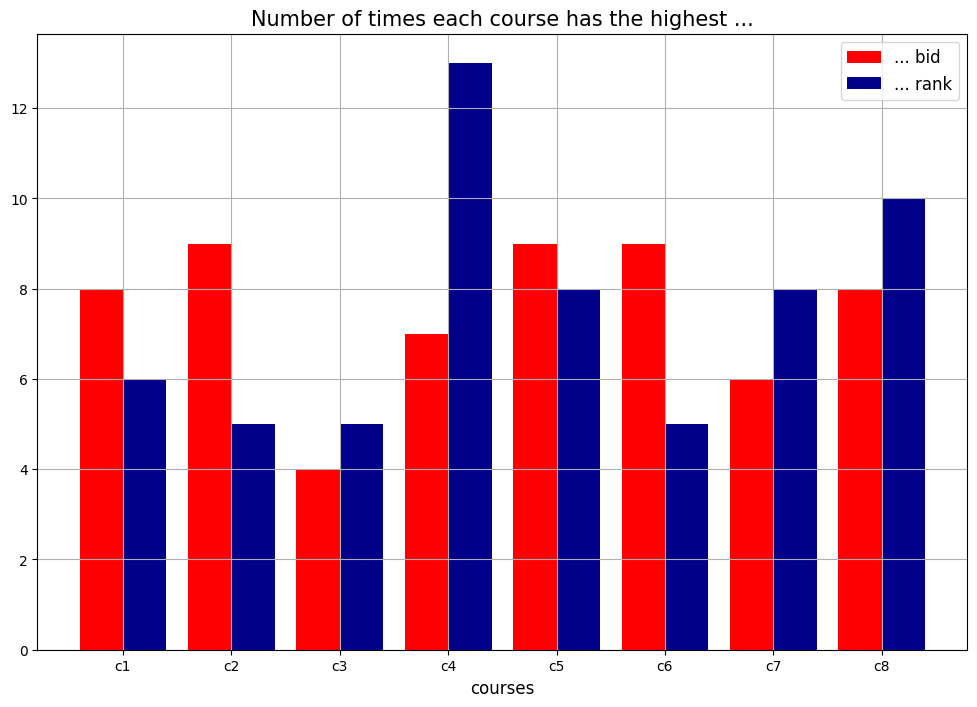

In [ ]:
plt.figure(figsize=(12,8))
x = np.arange(len(['c1','c2','c3','c4','c5','c6','c7','c8']))

#width of each bar
width = 0.40

plt.bar(x - width/2, n_high_course, width, label='... bid', color='red')
plt.bar(x + width/2, n_high_rank, width, label='... rank',color='darkblue')

plt.xlabel('courses', fontsize=12)
plt.xticks(x, ['c1','c2','c3','c4','c5','c6','c7','c8'])
plt.title('Number of times each course has the highest ...', fontsize=15)
plt.legend(fontsize = 12)
plt.grid()

plt.show()

In [ ]:
df

,c1,c2,c3,c4,c5,c6,c7,c8,R1,R2,R3,R4,R5,R6,R7,R8
UNI,,,,,,,,,,,,,,,,
0,42,224,129,36,346,88,47,88,c8,c4,c3,c7,c6,c5,c1,c2
1,98,46,113,32,345,140,45,181,c3,c8,c1,c6,c7,c2,c5,c4
2,210,114,121,181,30,279,55,10,c8,c4,c5,c3,c1,c6,c7,c2
3,409,276,43,9,67,41,16,139,c1,c5,c4,c3,c2,c7,c6,c8
4,196,32,17,337,241,117,51,9,c3,c7,c5,c4,c1,c6,c2,c8
5,112,16,171,10,252,4,159,276,c6,c7,c5,c2,c3,c8,c1,c4
6,189,5,54,50,27,265,252,158,c3,c1,c5,c8,c4,c7,c6,c2
7,40,43,71,709,35,22,26,54,c7,c8,c6,c5,c3,c4,c1,c2
8,430,164,10,92,150,71,56,27,c5,c4,c7,c3,c1,c2,c6,c8
